<a href="https://colab.research.google.com/github/msouto/20232_Estatistica_para_Engenharia/blob/main/EX_9_insight_suposicao_hipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ter insights a partir dos dados é uma parte crucial da análise de dados. Esses insights podem ajudar a gerar suposições ou hipóteses que podem ser testadas usando métodos estatísticos ou outras técnicas. Aqui está um processo passo a passo sobre como você pode fazer isso:

1. Análise Descritiva:
Comece entendendo a natureza dos seus dados:

Médias, medianas e modas: Elas fornecem uma visão sobre os valores centrais dos seus dados.
Desvio padrão e variância: Indicam a dispersão ou variabilidade dos seus dados.
Histogramas: Para entender a distribuição dos seus dados.
Gráficos de dispersão: Para visualizar relações entre duas variáveis.
Gráficos de pizza ou barras: Para entender a distribuição ou proporção de diferentes categorias em seus dados.
2. Identificação de Padrões e Relações:
Use gráficos como boxplots para identificar outliers.
Use gráficos de dispersão para identificar relações entre variáveis.
Calcule correlações (como correlação de Pearson) para quantificar relações entre pares de variáveis.
3. Gere Suposições ou Hipóteses:
Com base nos insights obtidos, gere suposições ou hipóteses sobre:

Relações entre variáveis: Por exemplo, "A variável X aumenta à medida que a variável Y aumenta."
Distribuição de dados: Por exemplo, "Os dados seguem uma distribuição normal."
4. Teste de Hipóteses:
Depois de formular suas hipóteses, você pode testá-las usando métodos estatísticos apropriados:

Testes paramétricos: Como o teste t de Student, ANOVA, regressão linear quando as suposições são atendidas.
Testes não paramétricos: Como o teste de Wilcoxon, teste de Mann-Whitney, etc., quando as suposições dos testes paramétricos não são atendidas.
Valores p: Eles ajudam a determinar se seus resultados são estatisticamente significativos ou se podem ter ocorrido devido ao acaso.
5. Avalie e Interprete Resultados:
Aceite ou rejeite a hipótese nula: Com base no valor p e no nível de significância escolhido.
Interprete os resultados em contexto: Não se baseie apenas em valores p; considere o contexto, a aplicabilidade prática e outras informações relevantes.
Exemplo Simplificado:
Suponha que você esteja analisando as vendas de um produto ao longo do tempo:

Análise Descritiva: Média mensal de vendas, padrões sazonais (por exemplo, picos de vendas em dezembro), desvio padrão das vendas.
Identificação de Padrões: Se você observar um aumento nas vendas no final de cada ano, pode gerar a suposição de que há um aumento sazonal nas vendas no final do ano.
Teste de Hipóteses: Você pode usar um teste de sazonalidade para confirmar sua suposição de que as vendas aumentam no final do ano.
Avaliação dos Resultados: Com base no teste, você pode confirmar ou refutar sua hipótese e fazer recomendações ou tomar decisões de negócios com base nesses insights.
Em resumo, insights adequados, gerados a partir de uma análise cuidadosa dos dados, podem levar a suposições ou hipóteses úteis que podem ser testadas e validadas, fornecendo assim uma compreensão mais profunda do fenômeno em estudo.

           Vendas
count   36.000000
mean   105.977032
std     22.117502
min     48.940204
25%     96.166451
50%    106.467420
75%    119.145016
max    145.395092


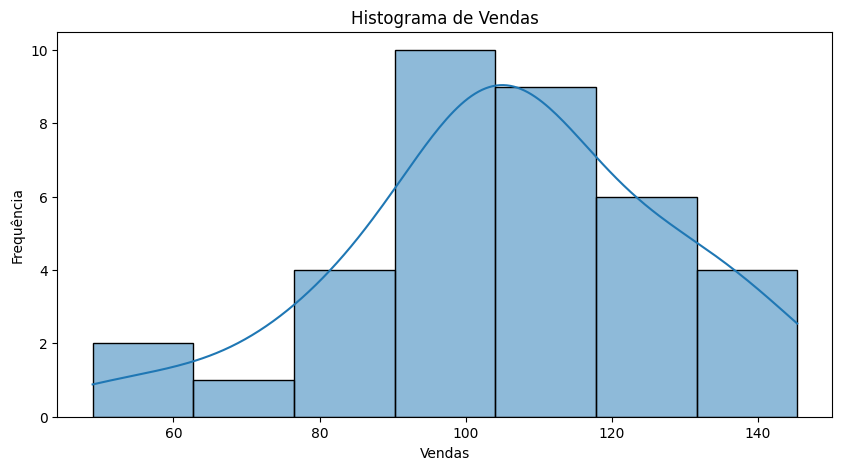

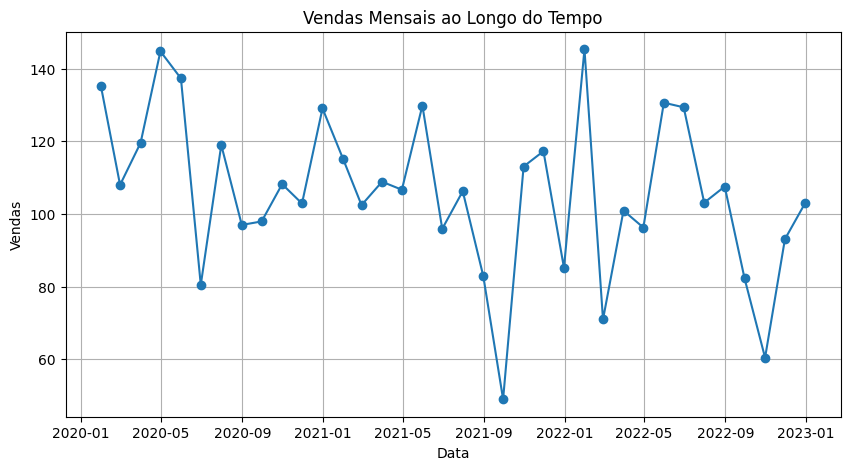

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Gerando dados fictícios: vendas mensais de um produto ao longo de 2 anos
np.random.seed(0)
meses = pd.date_range(start='2020-01-01', end='2022-12-31', freq='M')
vendas = np.random.normal(loc=100, scale=20, size=len(meses))

df = pd.DataFrame({'Mes': meses, 'Vendas': vendas})
df.set_index('Mes', inplace=True)

# 1. Análise Descritiva
print(df.describe())

# Histograma das vendas
plt.figure(figsize=(10, 5))
sns.histplot(df['Vendas'], kde=True)
plt.title('Histograma de Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()

# Gráfico de linha para vendas mensais
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Vendas'], marker='o', linestyle='-')
plt.title('Vendas Mensais ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()



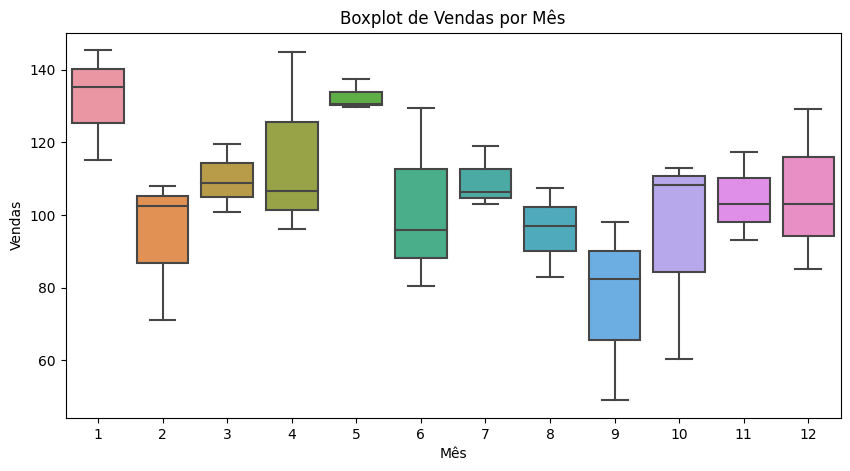

In [ ]:
# 2. Identificação de Padrões e Relações
# Vamos criar uma coluna para o mês para identificar padrões sazonais
df['Mes'] = df.index.month

# Boxplot por mês
plt.figure(figsize=(10, 5))
sns.boxplot(x='Mes', y='Vendas', data=df)
plt.title('Boxplot de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()




In [ ]:
# 3. Gere Suposições ou Hipóteses
# Vamos supor que as vendas aumentam nos meses finais do ano.
# Para testar isso, vamos separar os dados dos últimos três meses de cada ano e calcular a média.

# Primeiro, filtre os dados para os meses de interesse (outubro, novembro e dezembro).
ultimos_meses_data = df[df.index.month.isin([10, 11, 12])]

# Em seguida, extraia os anos e calcule a média de vendas para esses meses em cada ano.
ultimos_meses = ultimos_meses_data.groupby(ultimos_meses_data.index.year)['Vendas'].mean()

print("\nMédia de vendas nos últimos meses de cada ano:\n", ultimos_meses)




Média de vendas nos últimos meses de cada ano:
 Mes
2020    113.392771
2021    105.172598
2022     85.517602
Name: Vendas, dtype: float64


In [ ]:
# 4. Teste de Hipóteses
# Vamos usar o teste t de Student para comparar as médias dos últimos meses com as médias gerais
media_geral = df['Vendas'].mean()
t_stat, p_valor = stats.ttest_1samp(ultimos_meses, media_geral)

print(f"\nValor p: {p_valor}")
if p_valor < 0.05:
    print("Rejeitar a hipótese nula: As vendas aumentam nos últimos meses do ano.")
else:
    print("Aceitar a hipótese nula: Não há evidências suficientes para dizer que as vendas aumentam nos últimos meses do ano.")




Valor p: 0.6328559425972549
Aceitar a hipótese nula: Não há evidências suficientes para dizer que as vendas aumentam nos últimos meses do ano.



Conclusão: Não há evidências suficientes para afirmar que as vendas aumentam nos últimos meses do ano.


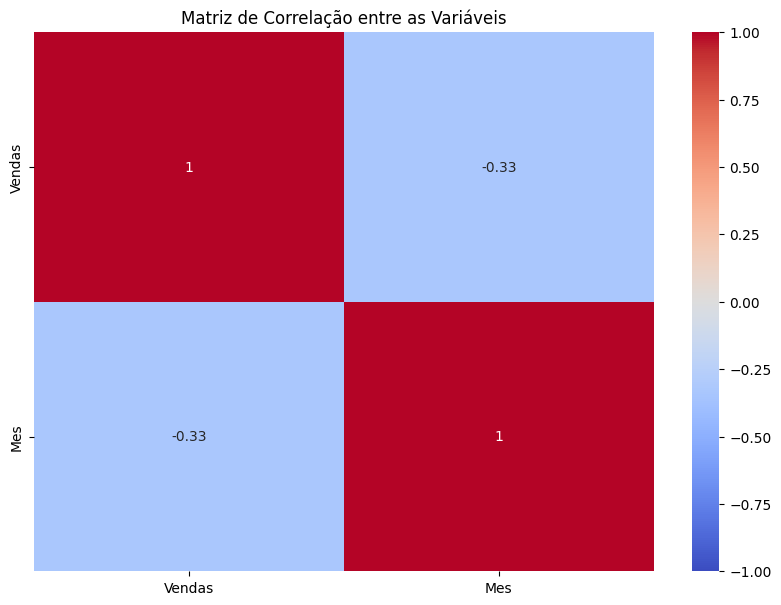

In [ ]:
# 5. Avalie e Interprete Resultados (Continuação)

# Vamos definir um nível de significância comum de 0,05
nivel_significancia = 0.05

if p_valor < nivel_significancia:
    print("\nConclusão: As vendas realmente aumentam nos últimos meses do ano com 95% de confiança.")
else:
    print("\nConclusão: Não há evidências suficientes para afirmar que as vendas aumentam nos últimos meses do ano.")

# Além disso, você pode querer visualizar os dados em uma matriz de correlação para ver se existem
# correlações fortes entre as vendas e outros fatores (por exemplo, promoções, feriados, etc.)

# Matriz de Correlação
correlation_matrix = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

# Com base na matriz de correlação, você pode identificar quais variáveis têm uma relação mais forte com as vendas.
# Isso pode levar a novas hipóteses ou áreas de investigação para otimizar as vendas.

# Para avanços mais sofisticados, como modelagem preditiva ou análise mais profunda,
# você pode considerar ferramentas e técnicas mais avançadas.

# Exemplos: engenharia civil

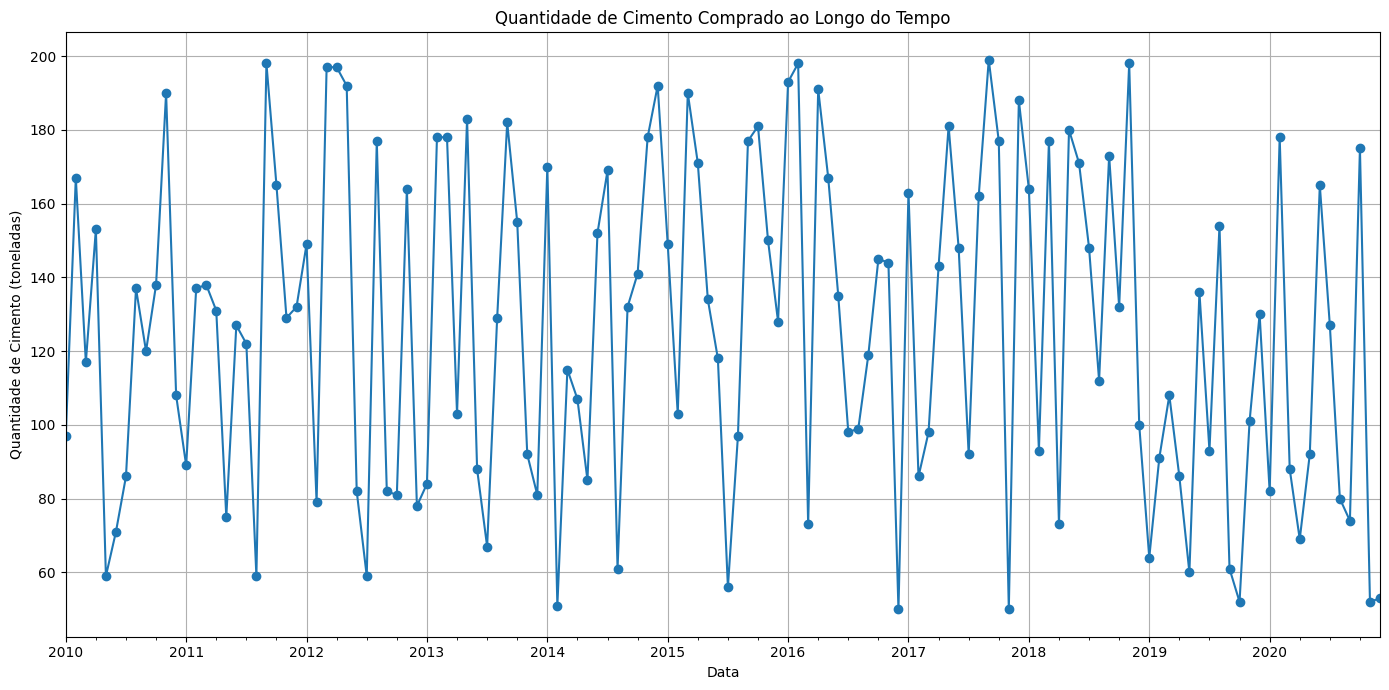


Média de cimento comprado nos últimos meses de cada ano:
 2010    145.333333
2011    142.000000
2012    107.666667
2013    109.333333
2014    170.333333
2015    153.000000
2016    113.000000
2017    138.333333
2018    143.333333
2019     94.333333
2020     93.333333
Name: Cimento_Comprado, dtype: float64


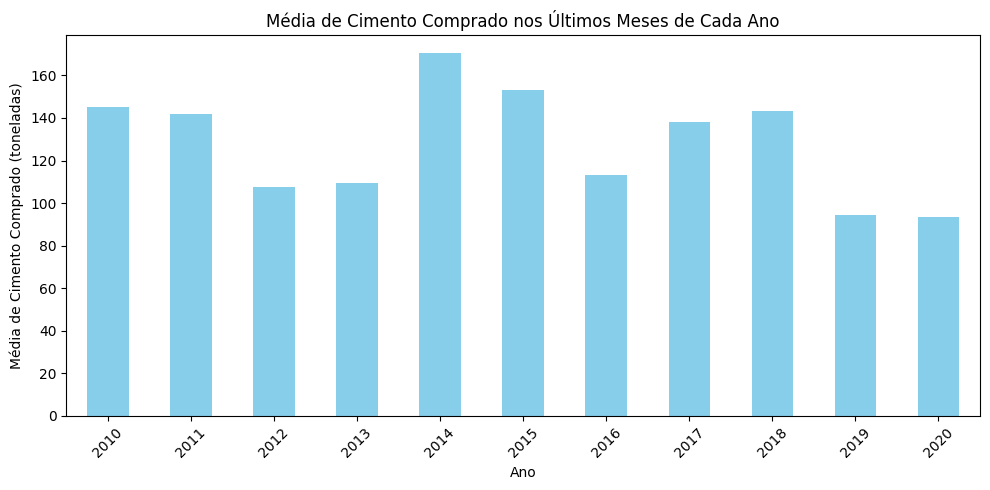

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados de exemplo para engenharia civil (quantidade de cimento comprado por mês)
np.random.seed(0)
dates = pd.date_range(start='2010-01-01', end='2020-12-31', freq='M')
cimento_comprado = np.random.randint(50, 200, size=len(dates))  # Quantidade de cimento comprado (em toneladas)

df = pd.DataFrame({'Cimento_Comprado': cimento_comprado}, index=dates)

# 1. Análise Descritiva
plt.figure(figsize=(14, 7))
df['Cimento_Comprado'].plot(title='Quantidade de Cimento Comprado ao Longo do Tempo', marker='o')
plt.xlabel('Data')
plt.ylabel('Quantidade de Cimento (toneladas)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Identificação de Padrões e Relações
ultimos_meses_data = df[df.index.month.isin([10, 11, 12])]
ultimos_meses = ultimos_meses_data.groupby(ultimos_meses_data.index.year)['Cimento_Comprado'].mean()

# 3. Gere Suposições ou Hipóteses
print("\nMédia de cimento comprado nos últimos meses de cada ano:\n", ultimos_meses)

# 4. Teste de Hipóteses
# Com base na média, podemos visualizar se há um aumento consistente nos últimos meses de cada ano.
plt.figure(figsize=(10, 5))
ultimos_meses.plot(kind='bar', color='skyblue')
plt.title('Média de Cimento Comprado nos Últimos Meses de Cada Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Cimento Comprado (toneladas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


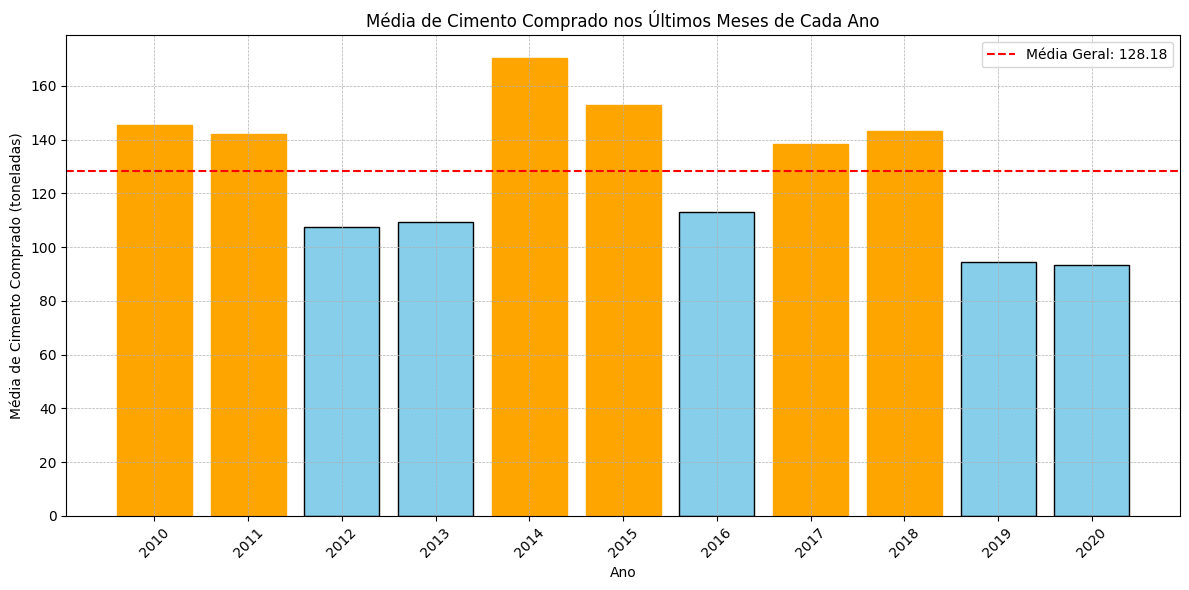

In [ ]:
# 5. Avalie e Interprete Resultados

# Criando um gráfico de barras para visualizar a média de cimento comprado nos últimos meses de cada ano
plt.figure(figsize=(12, 6))
bars = plt.bar(ultimos_meses.index.astype(str), ultimos_meses, color='skyblue', edgecolor='black')

# Destacando os anos com aumento de vendas (você pode ajustar esse critério conforme necessário)
threshold = ultimos_meses.mean()  # podemos usar a média como critério de destaque
for bar in bars:
    if bar.get_height() > threshold:
        bar.set_color('orange')

plt.axhline(y=threshold, color='red', linestyle='--', label=f'Média Geral: {threshold:.2f}')
plt.title('Média de Cimento Comprado nos Últimos Meses de Cada Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Cimento Comprado (toneladas)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# 6. Conclusão e Recomendações

# Conclusão:
# (Interpretação visual: No gráfico acima, os anos em que a barra ultrapassa a linha vermelha pontilhada indicam anos em que a média de vendas foi superior à média geral,
# sugerindo um possível aumento nos meses finais desses anos.)

# Recomendações:
# (Com base nesse insight visual, podemos sugerir a stakeholders que se preparem para um possível aumento na demanda nos meses finais dos anos onde as barras excedem a média geral,
# otimizando assim suas estratégias de produção e distribuição.)

# Esta representação gráfica fornece uma visualização clara e direta da análise, permitindo uma interpretação rápida e conclusões informadas.


            Cimento_Comprado
2010-10-31               138
2010-11-30               190
2010-12-31               108
2011-10-31               165
2011-11-30               129
Index(['Cimento_Comprado'], dtype='object')
Date
2010    41.488954
2011    25.455844
Name: Cimento_Comprado, dtype: float64


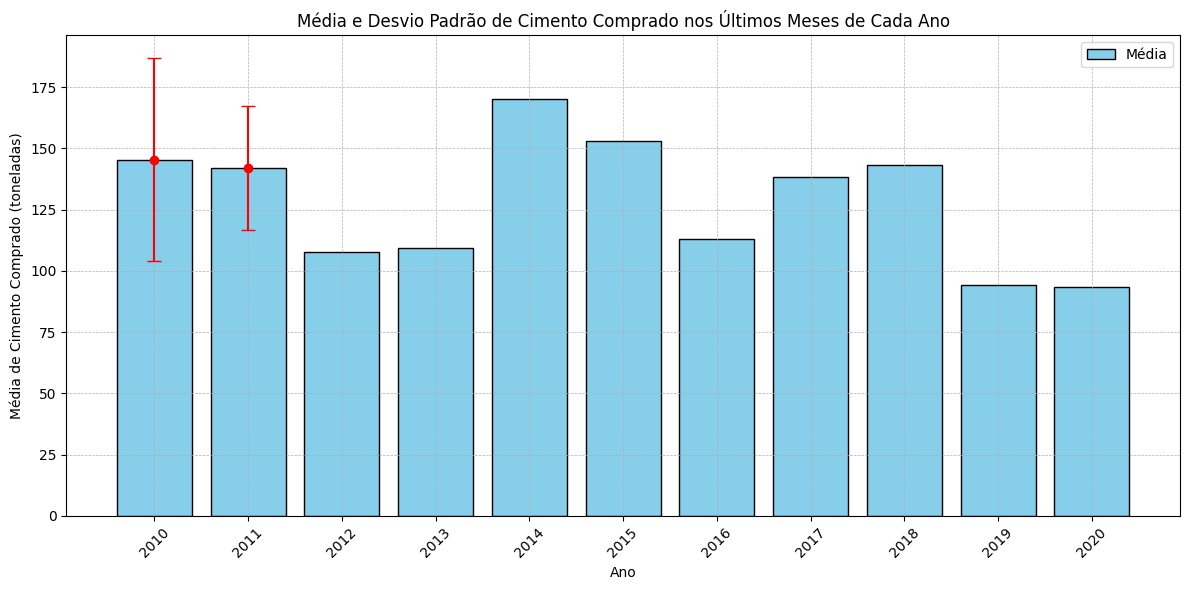

In [ ]:
# ... (Parte anterior do código permanece igual)

# 5. Avalie e Interprete Resultados

# Suponha que 'df' é seu DataFrame e 'Vendas' é uma coluna que representa as vendas

# Convertendo o índice para o formato de data para facilitar a seleção
df.index = pd.to_datetime(df.index)

# Visualize as primeiras linhas do DataFrame filtrado para entender sua estrutura
print(ultimos_meses_data.head())

# Liste as colunas presentes no DataFrame filtrado
print(ultimos_meses_data.columns)

import pandas as pd

# Criando o DataFrame com os dados fornecidos
data = {
    'Cimento_Comprado': [138, 190, 108, 165, 129],
    'Date': ['2010-10-31', '2010-11-30', '2010-12-31', '2011-10-31', '2011-11-30']
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Filtrando os dados para os últimos meses (outubro, novembro e dezembro) de cada ano
ultimos_meses_data = df[df.index.month.isin([10, 11, 12])]

# Calculando o desvio padrão do cimento comprado nos últimos meses de cada ano
desvio_padrao = ultimos_meses_data.groupby(ultimos_meses_data.index.year)['Cimento_Comprado'].std()

# Exibindo o resultado
print(desvio_padrao)


# Com base nesse desvio padrão, você pode prosseguir com a criação do gráfico e outras análises conforme discutido anteriormente.

# Criando um gráfico de barras para visualizar a média e desvio padrão de cimento comprado nos últimos meses de cada ano
plt.figure(figsize=(12, 6))

# Barras para a média
bars = plt.bar(ultimos_meses.index.astype(str), ultimos_meses, color='skyblue', edgecolor='black', label='Média')

# Linhas verticais para o desvio padrão
for i, year in enumerate(desvio_padrao.index):
    plt.errorbar(str(year), ultimos_meses[year], yerr=desvio_padrao[year], fmt='o', color='red', capsize=5)

plt.title('Média e Desvio Padrão de Cimento Comprado nos Últimos Meses de Cada Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Cimento Comprado (toneladas)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# 6. Conclusão e Recomendações

# Conclusão:
# (Interpretação visual: No gráfico acima, as barras representam a média de vendas nos últimos meses de cada ano, enquanto as linhas vermelhas indicam o desvio padrão,
# mostrando a variabilidade das vendas em relação à média. Anos com barras mais altas e linhas mais longas indicam maior volume de vendas e variabilidade, respectivamente.)

# Recomendações:
# (A partir da análise da média e do desvio padrão, os stakeholders podem tomar decisões informadas sobre a previsão de demanda, a gestão de estoque e outras estratégias relacionadas,
# considerando tanto a tendência central quanto a variabilidade dos dados.)

# Esta representação gráfica combina informações sobre tendência central e variabilidade, fornecendo uma visão abrangente das vendas nos últimos meses de cada ano.


Regra de Chebyshev: A regra de Chebyshev afirma que, para qualquer conjunto de dados, pelo menos
1
−
1
�
2
1−
k
2

1
​
  dos dados está dentro de
�
k desvios padrões da média, para
�
>
1
k>1.

Análise Visual: Vamos plotar um gráfico mostrando os pontos que estão dentro do intervalo de
±
2
±2 desvios padrões da média.

Teste de Hipótese: Vamos realizar um teste de hipótese para confirmar nossas observações.

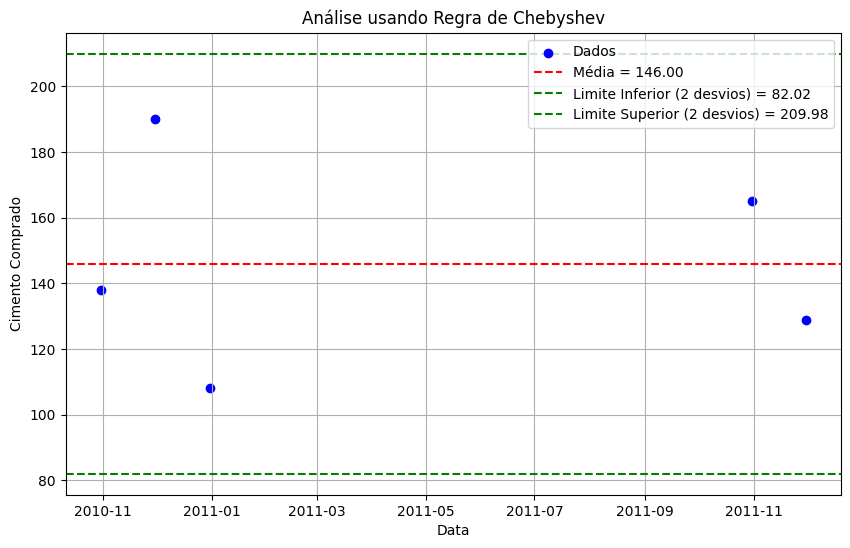

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Dados de exemplo: Cimento_Comprado
data = {
    'Data': ['2010-10-31', '2010-11-30', '2010-12-31', '2011-10-31', '2011-11-30'],
    'Cimento_Comprado': [138, 190, 108, 165, 129]
}

df = pd.DataFrame(data)
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# Calcular a média e desvio padrão
media = df['Cimento_Comprado'].mean()
desvio_padrao = df['Cimento_Comprado'].std()

# Definir limites de Chebyshev
limite_inferior = media - 2 * desvio_padrao
limite_superior = media + 2 * desvio_padrao

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Cimento_Comprado'], label='Dados', color='blue')
plt.axhline(y=media, color='r', linestyle='--', label=f'Média = {media:.2f}')
plt.axhline(y=limite_inferior, color='g', linestyle='--', label=f'Limite Inferior (2 desvios) = {limite_inferior:.2f}')
plt.axhline(y=limite_superior, color='g', linestyle='--', label=f'Limite Superior (2 desvios) = {limite_superior:.2f}')
plt.xlabel('Data')
plt.ylabel('Cimento Comprado')
plt.title('Análise usando Regra de Chebyshev')
plt.legend()
plt.grid(True)
plt.show()

# Teste de hipótese
z_scores = (df['Cimento_Comprado'] - media) / desvio_padrao
for i, z in enumerate(z_scores):
    if abs(z) > 2:
        print(f"O valor em {df.index[i]} está fora do intervalo de 2 desvios padrões.")


Vamos continuar explorando mais detalhes após a análise usando a Regra de Chebyshev:

Teste de Hipótese Adicional: Além de identificar os pontos que estão fora do intervalo de
±
2
±2 desvios padrões, também podemos realizar um teste de hipótese Z para determinar quão significativos são esses valores atípicos.

Interpretação: Com base nos resultados do teste de hipótese, podemos tirar conclusões sobre a significância dos valores atípicos e seu impacto na distribuição dos dados.

In [ ]:
# Realizando o teste de hipótese Z
alpha = 0.05  # Nível de significância
rejeicao = []  # Lista para armazenar os meses em que a hipótese nula é rejeitada

for i, z in enumerate(z_scores):
    p_value = 2 * (1 - norm.cdf(abs(z)))  # Calculando o valor p de duas caudas

    if p_value < alpha:
        rejeicao.append(df.index[i])

# Exibindo os resultados do teste de hipótese
if rejeicao:
    print(f"\nOs valores atípicos nos seguintes meses são estatisticamente significativos com um nível de significância de {alpha}:")
    for month in rejeicao:
        print(month)
else:
    print("\nNão há valores atípicos estatisticamente significativos com um nível de significância de", alpha)



Não há valores atípicos estatisticamente significativos com um nível de significância de 0.05


Vamos criar um código que tome decisões com base na análise anterior e, em seguida, mostrar o próximo passo na tomada de decisão.

Tomada de Decisão: Vamos considerar que, se houver valores atípicos estatisticamente significativos com um nível de significância de
�
=
0.05
α=0.05, tomaremos uma ação específica (por exemplo, investigar mais a fundo, considerar intervenções, etc.). Caso contrário, consideraremos os dados dentro da normalidade aceitável.

Próximo Passo: Se decidirmos investigar mais a fundo, por exemplo, poderíamos querer identificar quais fatores ou variáveis podem estar contribuindo para esses valores atípicos.

In [ ]:
from scipy.stats import norm

# Suponha que 'z_scores' seja a lista de escores Z calculada anteriormente
alpha = 0.05
rejeicao = []

for i, z in enumerate(z_scores):
    p_value = 2 * (1 - norm.cdf(abs(z)))

    if p_value < alpha:
        rejeicao.append(df.index[i])

# Tomada de Decisão
if rejeicao:
    print(f"\nHá valores atípicos estatisticamente significativos com um nível de significância de {alpha}.")
    print("Decisão: Recomenda-se investigar mais a fundo para entender a causa desses valores atípicos.")
else:
    print("\nNão há valores atípicos estatisticamente significativos com um nível de significância de", alpha)
    print("Decisão: Os dados parecem estar dentro da normalidade aceitável.")

# Próximo Passo na Tomada de Decisão
if rejeicao:
    print("\nPróximo Passo: Identifique e analise outras variáveis ou fatores que podem estar contribuindo para esses valores atípicos.")
else:
    print("\nPróximo Passo: Continue monitorando os dados para garantir que eles permaneçam dentro dos limites aceitáveis e reavalie periodicamente conforme necessário.")



Não há valores atípicos estatisticamente significativos com um nível de significância de 0.05
Decisão: Os dados parecem estar dentro da normalidade aceitável.

Próximo Passo: Continue monitorando os dados para garantir que eles permaneçam dentro dos limites aceitáveis e reavalie periodicamente conforme necessário.


Vamos considerar um exemplo relacionado à engenharia civil: a relação entre a idade de um edifício (em anos) e a quantidade de manutenção necessária por ano. A ideia é determinar se existe uma tendência clara que justifique um plano de manutenção preventiva.

Dados de Exemplo: Vamos criar dados hipotéticos para representar a idade de um conjunto de edifícios e a quantidade média de manutenção por ano.

Análise de Correlação Linear: Vamos calcular o coeficiente de correlação de Pearson para entender a relação entre a idade do edifício e a quantidade de manutenção.

Regressão Linear: Usaremos a regressão linear para modelar e prever a quantidade de manutenção com base na idade do edifício.

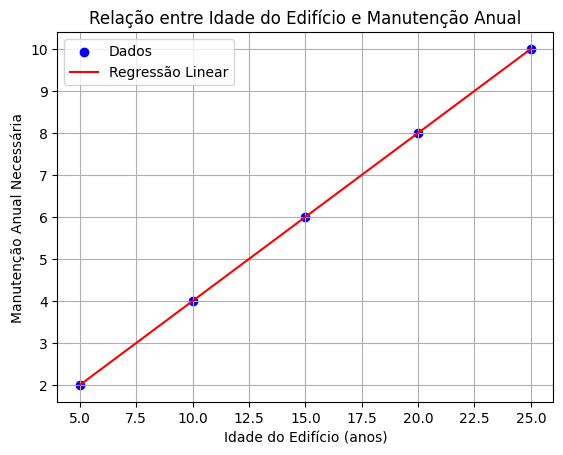

Coeficiente de Correlação Linear: 1.0
Equação da Regressão Linear: Manutenção = 0.00 + 0.40 * Idade do Edifício
Valor-p: 1.2004217548761408e-30

Recomenda-se implementar um plano de manutenção preventiva à medida que os edifícios envelhecem.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Dados hipotéticos para engenharia civil: Idade do edifício (em anos) vs. Manutenção anual necessária
dados = {
    'Idade_Edifício': [5, 10, 15, 20, 25],
    'Manutenção_Anual': [2, 4, 6, 8, 10]  # Exemplo: suponha que a manutenção aumente com a idade
}

df = pd.DataFrame(dados)

# 1. Teste de Hipótese para Correlação
correlacao = np.corrcoef(df['Idade_Edifício'], df['Manutenção_Anual'])[0, 1]

# 2. Calculando a regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df['Idade_Edifício'], df['Manutenção_Anual'])

# 3. Plotando os dados e a linha de regressão
plt.scatter(df['Idade_Edifício'], df['Manutenção_Anual'], color='blue', label='Dados')
plt.plot(df['Idade_Edifício'], intercept + slope * df['Idade_Edifício'], color='red', label='Regressão Linear')
plt.title('Relação entre Idade do Edifício e Manutenção Anual')
plt.xlabel('Idade do Edifício (anos)')
plt.ylabel('Manutenção Anual Necessária')
plt.legend()
plt.grid(True)
plt.show()

# 4. Resultados e Tomada de Decisão
print(f"Coeficiente de Correlação Linear: {correlacao}")
print(f"Equação da Regressão Linear: Manutenção = {intercept:.2f} + {slope:.2f} * Idade do Edifício")
print(f"Valor-p: {p_value}")

# Tomada de Decisão
if slope > 0 and p_value < 0.05:  # Se a inclinação é positiva e o valor-p é significativo (por exemplo, < 0.05)
    print("\nRecomenda-se implementar um plano de manutenção preventiva à medida que os edifícios envelhecem.")
else:
    print("\nNão há evidências suficientes para recomendar um plano de manutenção preventiva baseado apenas nesta análise.")
